In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
from denoising_diffusion_pytorch import Unet, GaussianDiffusion
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda')

/home/evan/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/home/evan/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = False,
)
model = model.to(device)


diffusion = GaussianDiffusion(
    model,
    image_size = 32,
    timesteps = 4000    # number of steps
)
diffusion.cuda()
# diffusion.device = device

GaussianDiffusion(
  (model): Unet(
    (init_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (time_mlp): Sequential(
      (0): SinusoidalPosEmb()
      (1): Linear(in_features=64, out_features=256, bias=True)
      (2): GELU(approximate='none')
      (3): Linear(in_features=256, out_features=256, bias=True)
    )
    (downs): ModuleList(
      (0): ModuleList(
        (0-1): 2 x ResnetBlock(
          (mlp): Sequential(
            (0): SiLU()
            (1): Linear(in_features=256, out_features=128, bias=True)
          )
          (block1): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): RMSNorm()
            (act): SiLU()
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (block2): Block(
            (proj): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm): RMSNorm()
            (act): SiLU()
            (dropout): Dropout(p=0.0,

In [3]:
class_idx = 3

basic_transform = transforms.ToTensor()
trainset_full = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=basic_transform)

target_indices = [i for i, label in enumerate(trainset_full.targets) if label == class_idx]
trainset = Subset(trainset_full, target_indices)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=12, shuffle=True)


print(f'Number of training samples for class cat": {len(trainset)}')
def imshow(img):
    npimg = img.numpy()  # Convert to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose to (H, W, C) for plotting
    plt.show()

Files already downloaded and verified
Number of training samples for class cat": 5000


In [4]:
num_epochs= 1

optimizer = torch.optim.Adam(diffusion.model.parameters(), lr=3e-4)

for epoch in range(num_epochs):
    for batch, _ in trainloader:
        optimizer.zero_grad()
        loss = diffusion(batch.to(device))
        print(loss)
        loss.backward()
        optimizer.step()


tensor(0.5530, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.9043, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4675, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4921, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3458, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4525, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4408, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3496, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.5321, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.5816, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3597, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4455, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1673, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3115, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.2278, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3885, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.3178, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.4500, device='cuda:0',

In [5]:
for param_group in optimizer.param_groups:
    param_group['lr'] = 8e-5


for epoch in range(20):
    for batch, _ in trainloader:
        optimizer.zero_grad()
        loss = diffusion(batch.to(device))
        print(loss)
        loss.backward()
        optimizer.step()

tensor(0.0611, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0965, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0609, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0793, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0444, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0738, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1146, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0950, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0848, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0471, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1126, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.1232, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0827, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0561, device='cuda:0',

In [8]:
sampled = diffusion.sample(batch_size=4)

sampling loop time step: 100%|██████████| 4000/4000 [01:05<00:00, 60.89it/s]


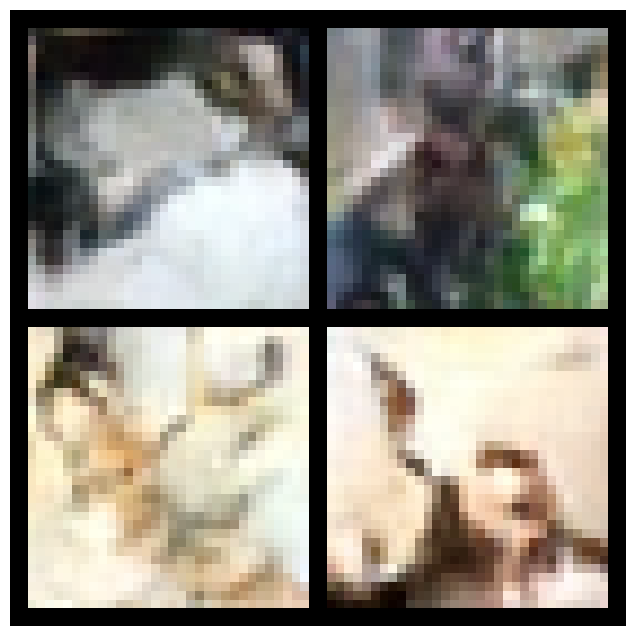

In [9]:
def show_images(tensor_images, nrow=2, figsize=(8, 8)):
    """
    Displays a grid of images.

    Args:
        tensor_images (torch.Tensor): Batch of images (B, C, H, W).
        nrow (int): Number of images per row.
        figsize (tuple): Size of the figure.
    """
    # Move to CPU and detach from the graph
    images = tensor_images.detach().cpu()
    
    # Create a grid of images
    grid = torchvision.utils.make_grid(images, nrow=nrow, normalize=True)
    
    # Convert to NumPy for matplotlib
    np_grid = grid.permute(1, 2, 0).numpy()
    
    # Plot the images
    plt.figure(figsize=figsize)
    plt.imshow(np_grid)
    plt.axis('off')  # Hide axis
    plt.show()

show_images(sampled)